# Kaggle Starter Code

## Develop a model

**Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

**Read in training data**

In [2]:
df = pd.read_csv('flatiron-regression-housing/training.csv')

**Preprocessing**

In [3]:
# Null values are marked with the string ' -  '
# Replace this string with null values
df = df.replace(' -  ', np.nan)
# Drop null target values
df = df.dropna(subset=['SALE PRICE'])

**Fix datatypes**

In [4]:
df.dtypes

id                                 int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                  object
GROSS SQUARE FEET                 object
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE DATE                         object
SALE PRICE                        object
dtype: object

For this walkthrough, we will just use square footage as the independent variable. 

Let's convert to a float datatype.

In [5]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)

Imputer null values of indepedent variable. 

**Create a train test split**

In [6]:
model_1_df = df.copy()
X_1, y_1 = model_1_df[['LAND SQUARE FEET']], model_1_df['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, random_state=2021)

In [7]:
# Replace missing values with the median
imputer = SimpleImputer(strategy='median')
# Fit imputer to the indepedent variable
# using only the training data
imputer.fit(X_train)
# Replace missing values in the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

**Fit a model**

In [8]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

**Evaluate model performance**

In [9]:
train_preds = model_1.predict(X_train)
test_preds = model_1.predict(X_test)

train_score = mean_squared_error(y_train, train_preds)
test_score = mean_squared_error(y_test, test_preds)

print('Train score:', train_score)
print('Test score:', test_score)

Train score: 36809480181468.875
Test score: 99138629509997.28


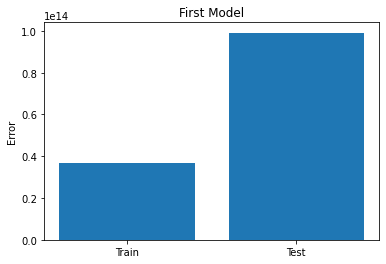

In [10]:
plt.bar(['Train', 'Test'], [train_score, test_score])
plt.ylabel('Error')
plt.title('First Model');

## Create submission predictions

Kaggle competitions will always provide you with a `test` dataset that contains all of the independent variables in the training data, *but does not contain the target column.* 

The idea is that you want to build a model using the training data so it can predict accurately when we do not know the target value.

**Import testing data**

In [11]:
test_df = pd.read_csv('flatiron-regression-housing/testing.csv')

In [12]:
test_df.head(2)

,id,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE DATE
0,52192,4,BELLE HARBOR,01 ONE FAMILY DWELLINGS,1,16261,68,,A2,446 BEACH 139TH STREET,...,11694,1,0,1,4000,2145,1960,1,A2,2017-06-21 00:00:00
1,18587,2,BAYCHESTER,02 TWO FAMILY DWELLINGS,1,4775,41,,B1,3026 WICKHAM AVENUE,...,10469,2,0,2,2700,2880,1960,1,B1,2017-06-30 00:00:00


In [13]:
test_df = test_df.replace(' -  ', np.nan)

**Repeat the same preprocessing**

In [14]:
test_X = test_df[['LAND SQUARE FEET']]

test_X = imputer.transform(test_X)

**Create final predictions**

In [15]:
final_preds = model_1.predict(test_X)

**Save predictions**

*The kaggle competition provides the following instructions for submitting predictions:*

----------

Your submission should be in the form a csv file with two columns. 
1. `id`
2. `target`

The `id` column should be the `id` column found in the predictors dataset.

**For example,** if I were to submit a csv of predictions where I predict the mean for every observations, the first three rows of the submission would look like this:

| id    | target  |
|-------|---------|
| 25427 | 1294634 |
| 71461 | 1294634 |
| 20636 | 1294634 |


***It is recommended that you save your predictions to csv using `pd.to_csv` and that you import the saved file into a notebook, to make sure the file is structured as intended.***

--------

The easiest way to do this, is to add the predictions to the original dataframe and then isolate the columns we want. 

In [16]:
# Add predictions to the test dataframe
test_df['target'] = final_preds
# Isolate the columns we want in our submission
submission_df = test_df[['id', 'target']]

Check the shape. The shape of our submission *must* be `(14955, 2)`

In [18]:
submission_df.shape

(14955, 2)

**Now we just need to save the submission to a `.csv` file.**

In this case, you should set `index=False`.

In [19]:
submission_df.to_csv('joél_submission.csv', index=False)

## Submit Predictions

Once you have saved you predictions to a csv file, you can submit them [here](https://www.kaggle.com/c/flatiron-regression-housing/submit)